1.数据预览

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("air_data.csv")

In [3]:
df.shape

(62988, 44)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


2.数据处理

数据中存在“总票价”为0，但“总飞行公里数”不为0的吊诡现象。删除这部分后剩余62044行数据，可见这部分数据量很小，所以直接删除。（“总飞行公里数”为0，且平均折扣为0的不在此列）

In [5]:
df = df[df["SUM_YR_1"].notnull() & df["SUM_YR_2"].notnull()]
index1 = df["SUM_YR_1"] != 0
index2 = df["SUM_YR_2"] != 0
index3 = (df["SEG_KM_SUM"] == 0) & (df["avg_discount"] == 0)
df = df[index1 | index2| index3]
print(df.shape)

(62044, 44)


3.理论建模

根据传统的RFM模型，设定下列3个指标：

最近消费时间、消费频次、消费金额

In [ ]:
3.1查看最近消费时间，没有异常值（观察窗口为2年，没有大于730的值）

In [8]:
df["LAST_TO_END"].unique()

array([  1,   7,  11,  97,   5,  79,   3,   6,  15,  22,  67,   2,  65,
        45,  24,   4,  23,  74,  17,  18,   8,  16, 108,  34, 125,  13,
        38, 304,  21,  14,  19,  88,  62,  36,  29,  12,   9, 144,  10,
        53,  63,  44,  27,  59,  25, 135, 184, 157, 121,  49,  30,  95,
       107, 179,  69,  57,  51,  31, 102, 114, 178,  26, 317, 290,  99,
        32,  83,  61,  20, 112,  56, 113,  33, 136,  77, 351,  66,  84,
        68,  48,  94,  41,  85,  37, 243,  73, 158, 181,  58,  46,  93,
       104,  89, 230,  86, 103,  43, 163,  76, 195,  71,  28,  35, 101,
        75,  70,  60, 288, 143, 105,  39,  82, 123, 376,  96, 235,  72,
       109,  42, 180, 287, 151, 130,  87, 404, 148, 220, 117,  40, 119,
        81,  92, 175,  64, 263, 437,  52,  50, 217, 265, 289, 224,  90,
       255, 131,  47, 314, 345, 100,  78, 214, 120, 461, 356, 188, 417,
       193, 201, 199, 279, 146, 266, 132, 261, 147, 187,  55, 354, 413,
       405,  91, 280, 154, 141, 209, 110, 244, 153, 194, 283, 29

In [12]:
df1=df[["LAST_TO_END","SUM_YR_1","SUM_YR_2","P1Y_Flight_Count","L1Y_Flight_Count"] ]

In [13]:
df1["最近一次消费时间"] = df1["LAST_TO_END"] 

df1["消费金额"] = df1["SUM_YR_1"] + df1["SUM_YR_2"]

df1["消费频次"] = df1["P1Y_Flight_Count"] + df1["L1Y_Flight_Count"]

In [14]:
df1.head()

,LAST_TO_END,SUM_YR_1,SUM_YR_2,P1Y_Flight_Count,L1Y_Flight_Count,最近一次消费时间,消费金额,消费频次
0,1,239560.0,234188.0,103,107,1,473748.0,210
1,7,171483.0,167434.0,68,72,7,338917.0,140
2,11,163618.0,164982.0,65,70,11,328600.0,135
3,97,116350.0,125500.0,13,10,97,241850.0,23
4,5,124560.0,130702.0,71,81,5,255262.0,152


In [16]:
df1.drop(["LAST_TO_END","SUM_YR_1","SUM_YR_2","P1Y_Flight_Count","L1Y_Flight_Count"],axis=1,inplace=True)

In [17]:
df1.head()

,最近一次消费时间,消费金额,消费频次
0,1,473748.0,210
1,7,338917.0,140
2,11,328600.0,135
3,97,241850.0,23
4,5,255262.0,152


数据标准化（归一化），将有量纲数据转化为无量纲数据。

In [18]:
df1_z = (df1 - df1.mean(axis=0))/(df1.std(axis=0))
df1_z.head()

,最近一次消费时间,消费金额,消费频次
0,-0.944948,30.096335,14.034016
1,-0.911894,21.325905,9.073213
2,-0.889859,20.654809,8.718869
3,-0.416098,15.011932,0.781585
4,-0.922912,15.884350,9.923636


查看是否还有无空值。

In [19]:
df1_z.isnull().sum().sort_values()

最近一次消费时间    0
消费金额        0
消费频次        0
dtype: int64

计算簇惯性，寻找“拐点”。

In [20]:
from sklearn.cluster import KMeans

def distEclud(vecA, vecB):
    #计算两个向量的欧式距离的平方，并返回
    return np.sum(np.power(vecA - vecB, 2))
 
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train.values
    nums=range(2,10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in  range(len(df1_z)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是",num , "时； SSE是", sse)
        SSE.append(sse)
    return nums, SSE
 
nums, SSE = test_Kmeans_nclusters(df1_z)


簇数是 2 时； SSE是 110339.38871426535
簇数是 3 时； SSE是 64835.32454918291
簇数是 4 时； SSE是 45517.2439898846
簇数是 5 时； SSE是 37245.664780822335
簇数是 6 时； SSE是 30542.34678053665
簇数是 7 时； SSE是 26299.066793065536
簇数是 8 时； SSE是 23784.67933371796
簇数是 9 时； SSE是 21446.35219181973


数据可视化，观察SSE与K取值，尝试找出合适的K值。

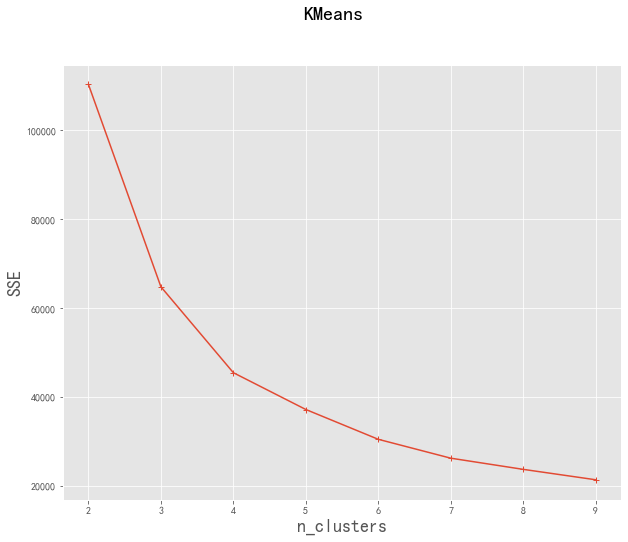

In [21]:
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("n_clusters", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()


图中并没有出现特别明显的“拐点”，但是3和4还是可以看到有一定程度的转折。

故下面分别对K值取3和4进行数据可视化。

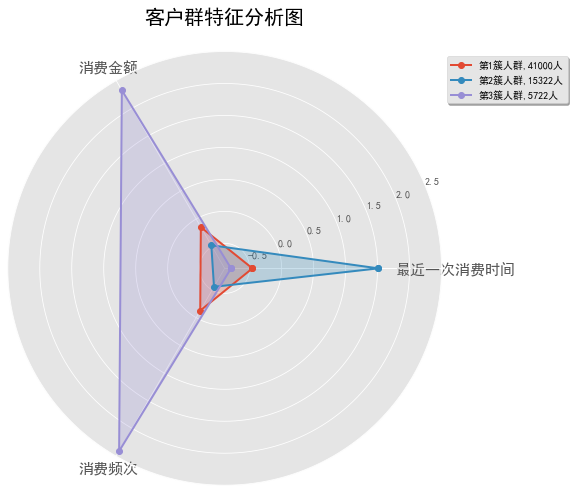

In [23]:
kmodel = KMeans(n_clusters=3, n_jobs=4)
kmodel.fit(df1_z)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max_bad = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(df1_z.columns) + [u'类别数目'] #重命名表头
 
# 绘图
fig=plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ['最近一次消费时间', '消费金额', '消费频次']
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max_bad+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形
plt.show()


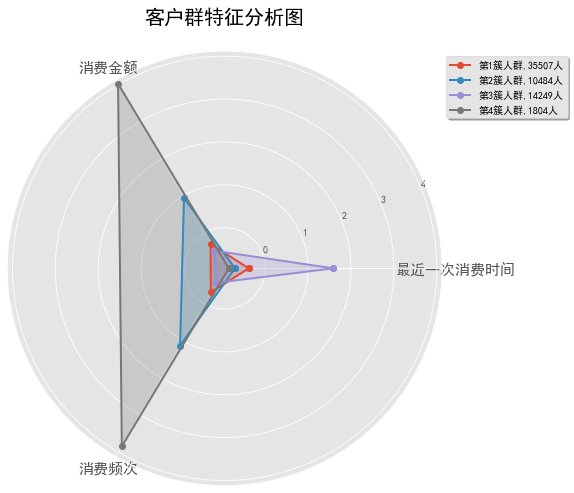

In [25]:
kmodel = KMeans(n_clusters=4, n_jobs=4)
kmodel.fit(df1_z)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max_bad = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(df1_z.columns) + [u'类别数目'] #重命名表头
 
# 绘图
fig=plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ['最近一次消费时间', '消费金额', '消费频次']
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max_bad+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形
plt.show()

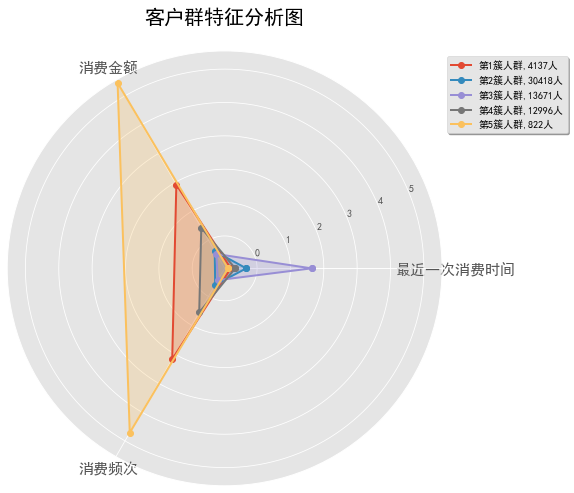

In [26]:
kmodel = KMeans(n_clusters=5, n_jobs=4)
kmodel.fit(df1_z)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max_bad = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(df1_z.columns) + [u'类别数目'] #重命名表头
 
# 绘图
fig=plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ['最近一次消费时间', '消费金额', '消费频次']
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max_bad+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形
plt.show()